In [1]:
# Reading data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../../data-source/superstore_column_fixed.csv')

### Dataset Structural Info

In [2]:
df.shape

(51290, 27)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer_ID     51290 non-null  object 
 4   Customer_Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   Record_Count    51290 non-null  int64  
 8   Order_Date      51290 non-null  object 
 9   Order_ID        51290 non-null  object 
 10  Order_Priority  51290 non-null  object 
 11  Product_ID      51290 non-null  object 
 12  Product_Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row_ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isnull().sum()


Category          0
City              0
Country           0
Customer_ID       0
Customer_Name     0
Discount          0
Market            0
Record_Count      0
Order_Date        0
Order_ID          0
Order_Priority    0
Product_ID        0
Product_Name      0
Profit            0
Quantity          0
Region            0
Row_ID            0
Sales             0
Segment           0
Ship_Date         0
Ship_Mode         0
Shipping_Cost     0
State             0
Sub_Category      0
Year              0
Market2           0
Weeknum           0
dtype: int64

### Dataset Number Columns Info

In [6]:
df.describe()

,Discount,Record_Count,Profit,Quantity,Row_ID,Sales,Shipping_Cost,Year,Weeknum
count,51290.000000,51290.0,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,1.0,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112
std,0.212280,0.0,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795
min,0.000000,1.0,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.0,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,1.0,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,1.0,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,1.0,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000


In [7]:
df_num_columns = df[['Discount', 'Profit', 'Quantity', 'Sales', 'Shipping_Cost', 'Year', 'Weeknum']]

In [8]:
df_num_columns.head()

,Discount,Profit,Quantity,Sales,Shipping_Cost,Year,Weeknum
0,0.0,9.3312,3,19,4.37,2011,2
1,0.0,9.2928,2,19,0.94,2011,4
2,0.0,9.8418,3,21,1.81,2011,32
3,0.0,53.2608,2,111,4.59,2011,32
4,0.0,3.1104,1,6,1.32,2011,40


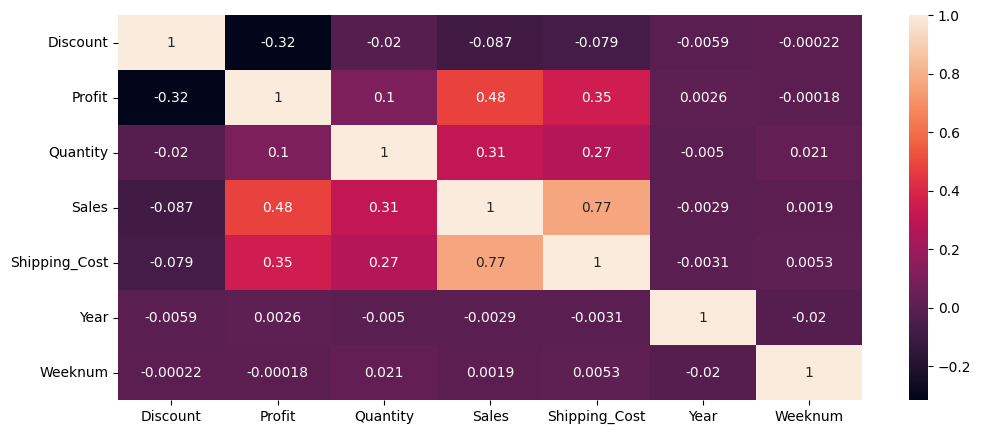

In [9]:
plt.figure(figsize=(12, 5))  
sns.heatmap(df_num_columns.corr(), annot=True)
plt.show()

### Impact of Profit, Sales, Discount and Quantity beetween each other

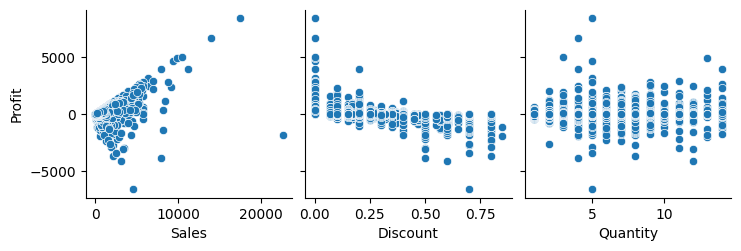

In [33]:
sns.pairplot(data=df_num_columns, x_vars=['Sales', 'Discount', 'Quantity'], y_vars=['Profit'])

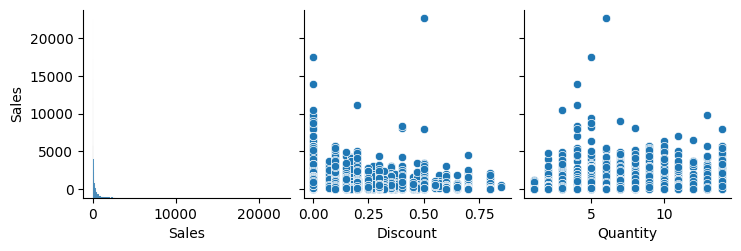

In [32]:
sns.pairplot(data=df_num_columns, x_vars=['Sales', 'Discount', 'Quantity'], y_vars=['Sales'])

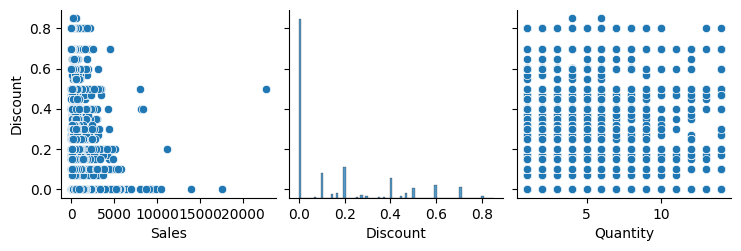

In [31]:
sns.pairplot(data=df_num_columns, x_vars=['Sales', 'Discount', 'Quantity'], y_vars=['Discount'])

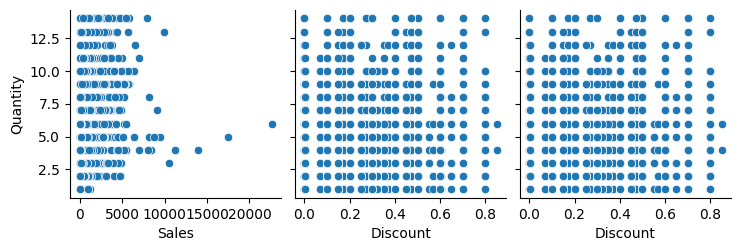

In [30]:
sns.pairplot(data=df_num_columns, x_vars=['Sales', 'Discount', 'Discount'], y_vars=['Quantity'])

### Vendas por ano

In [48]:
df_profit_grouped = df_num_columns.groupby('Year')['Profit'].sum().reset_index()

In [ ]:
df_sales_grouped = df_num_columns.groupby('Year')['Sales'].sum().reset_index()

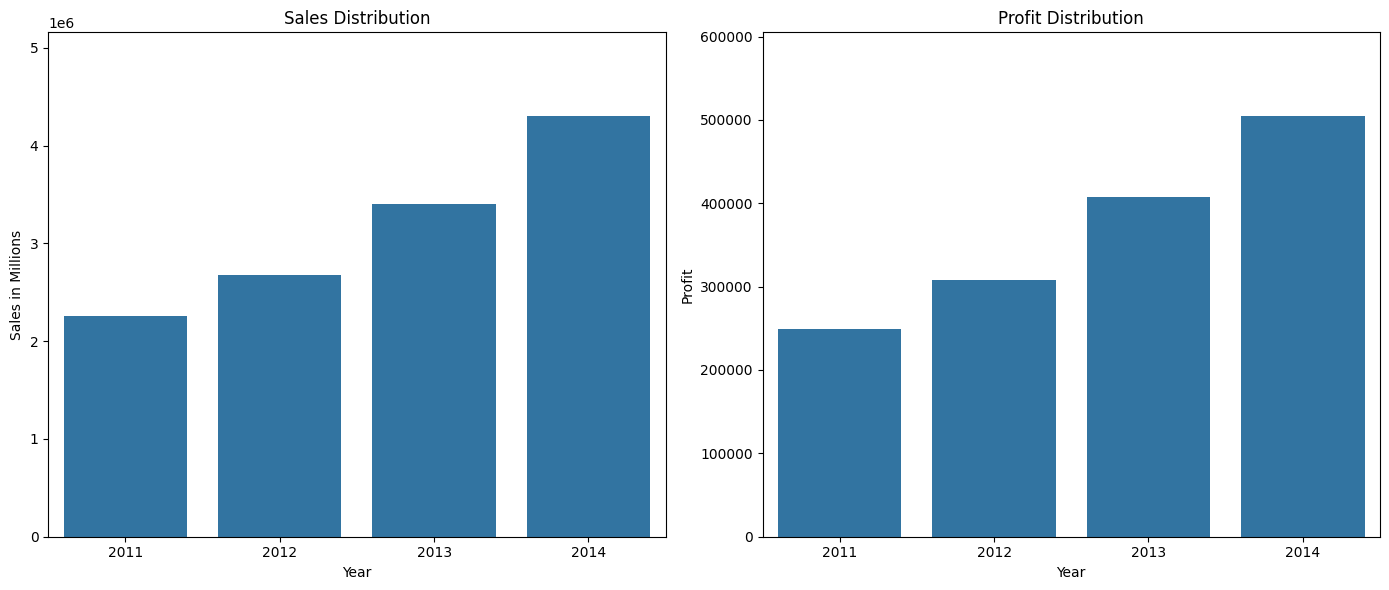

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


# Gráfico 1
sns.barplot(data=df_sales_grouped, y='Sales', x='Year', ax=axes[0])
axes[0].set_title('Sales Distribution')

# Gráfico 2
sns.barplot(data=df_profit_grouped, y='Profit', x='Year', ax=axes[1])
axes[1].set_title('Profit Distribution')

plt.tight_layout()
axes[0].set_ylim(0, df_sales_grouped['Sales'].max() + df_sales_grouped['Sales'].max() * 0.2)
axes[1].set_ylim(0, df_profit_grouped['Profit'].max() + df_profit_grouped['Profit'].max() * 0.2)

axes[0].set_ylabel('Sales in Millions')

plt.show()

### Categorical Columns Analysis